In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.ion()

import sys
sys.path.append('../../')

import logomaker

In [2]:
# Create CRP logo from IUPAC motif
iupac_seq = 'WWNTGTGANNNNNNTCACANWW'
iupac_mat = logomaker.iupac_to_matrix(iupac_seq, to_type='probability')
#logo = logomaker.Logo(iupac_mat,negate_values=False,colors=[1,0,0])

In [3]:
# Load CRP binding site sequences
with open('../data/crp_sites.fasta','r') as f:
    seqs = [l.strip() for l in f.readlines() if '>' not in l and len(l.strip())>0]
    
# Preview sequences
print('There are %d sequences, all of length %d'%(len(seqs), len(seqs[0])))
seqs[:10]

There are 358 sequences, all of length 26


['ATAAGCAGGATTTAGCTCACACTTAT',
 'AAAAATGTGATACCAATCACAGAATA',
 'ATATTGGTGATCCATAAAACAATATT',
 'ATATTGGTGAGGAACTTAACAATATT',
 'GATTATTTGCACGGCGTCACACTTTG',
 'CAAAGTGTGACGCCGTGCAAATAATC',
 'CTTTCTTCGTAACGCCTCGCAAATTT',
 'TTATATGTGGTGCTAATACCCGGTTC',
 'GAACCGGGTATTAGCACCACATATAA',
 'AGAAGTTTGAATTGTTACAAAAAGAC']

In [4]:
# Create background
gc = .51
background = [(1-gc)/2, gc/2, gc/2, (1-gc)/2]
background

[0.245, 0.255, 0.255, 0.245]

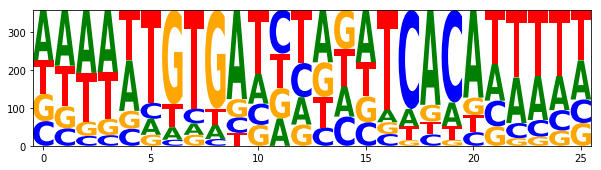

In [5]:
# Alignment -> Counts matrix
counts_mat = logomaker.alignment_to_matrix(seqs)
logo = logomaker.Logo(counts_mat)

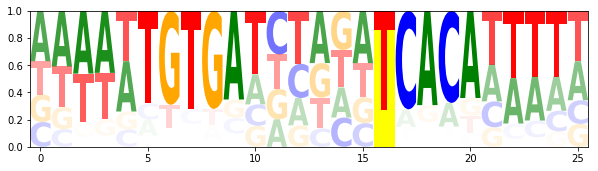

In [6]:
# Alignment -> Probability matrix
prob_mat = logomaker.alignment_to_matrix(seqs, to_type='probability')

logo = logomaker.Logo(prob_mat,draw_now=False)
logo.fade_glyphs_in_probability_logo(v_alpha0=0.1,v_alpha1=0.5)
logo.highlight_position(p=16)

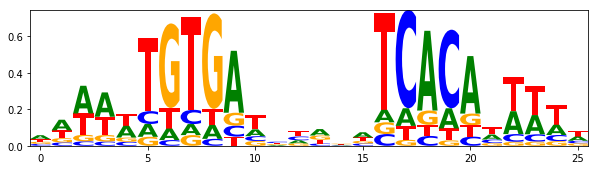

In [7]:
# Alignment -> Information matrix
info_mat = logomaker.alignment_to_matrix(seqs, to_type='information')
info_mat.head()

logo = logomaker.Logo(info_mat)

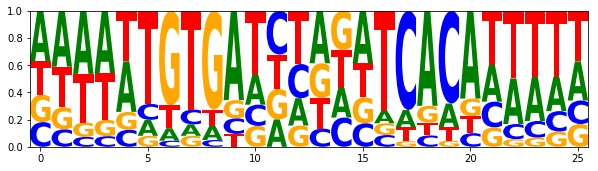

In [8]:
# Normalize counts
normalized_mat = logomaker.normalize_matrix(counts_mat)
logomaker.Logo(normalized_mat)

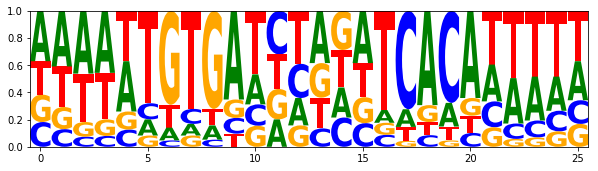

In [9]:
# Counts matrix -> Probability matrix
prob_mat = logomaker.transform_matrix(counts_mat, 
                                      from_type='counts', 
                                      to_type='probability')
logomaker.Logo(prob_mat)

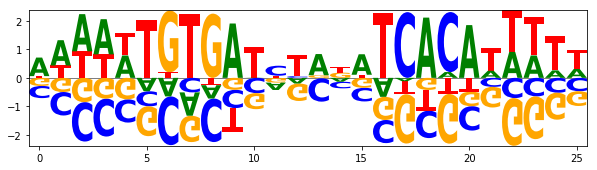

In [10]:
# Counts matrix -> Weight matrix
weight_mat = logomaker.transform_matrix(counts_mat, 
                                        background=background,
                                        from_type='counts', 
                                        to_type='weight')
logomaker.Logo(weight_mat, center_values=True)

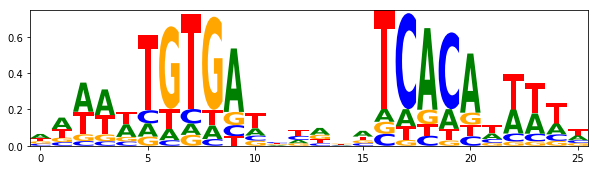

In [11]:
# Counts matrix -> Information matrix
info_mat = logomaker.transform_matrix(counts_mat, 
                                     background=background,
                                     from_type='counts', 
                                     to_type='information') 
logomaker.Logo(info_mat)

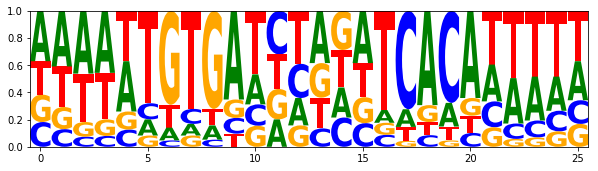

In [12]:
# Information matrix -> Probability matrix
prob_mat_2 = logomaker.transform_matrix(info_mat, 
                                        background=background,
                                        from_type='information', 
                                        to_type='probability')
logomaker.Logo(prob_mat_2)

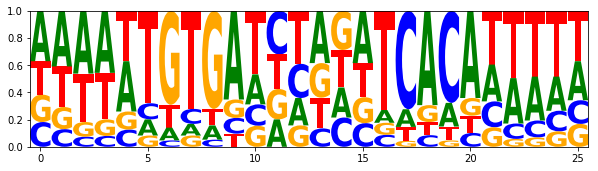

In [13]:
# Weight matrix -> Probability matrix
prob_mat_3 = logomaker.transform_matrix(weight_mat, 
                                        background=background,
                                        from_type='weight', 
                                        to_type='probability')
logomaker.Logo(prob_mat_3)

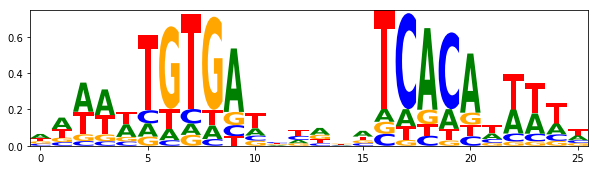

In [14]:
# Weight matrix -> Information matrix
info_mat_2 = logomaker.transform_matrix(weight_mat, 
                                        background=background,
                                        from_type='weight', 
                                        to_type='information')
logomaker.Logo(info_mat_2)

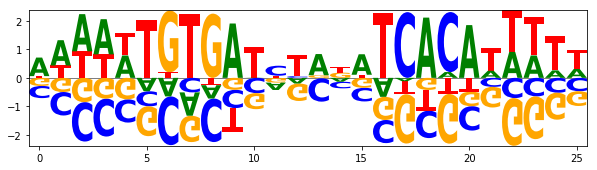

In [15]:
# Information matrix -> Weight matrix
weight_mat_2 = logomaker.transform_matrix(info_mat, 
                                          background=background,
                                          from_type='information', 
                                          to_type='weight')
logomaker.Logo(weight_mat_2, center_values=True)

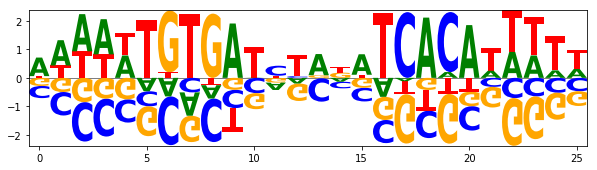

In [16]:
# Center matrix
centered_mat = logomaker.center_matrix(weight_mat)
logomaker.Logo(centered_mat)

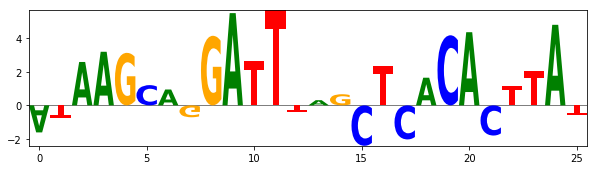

In [17]:
# draw saliency matrix
sequence = 'ATAAGCAGGATTTAGCTCACACTTAT'
saliency_values = np.random.uniform(low=-3.0, high=6.0, size=(len(sequence),))

saliency_mat = logomaker.saliency_to_matrix(sequence,saliency_values)
logomaker.Logo(saliency_mat)